# 1) O diâmetro de um asteroide do cinturão principal foi medido por técnicas de ocultação de estrelas. As observações de vários astrônomos forneceram as seguintes medidas de diâmetro em km: 320, 315, 327, 313, 318, 319, 330, 317, 328, 332.

## a) Estime qual é o diâmetro desse asteroide com um intervalo de confiança de 97.5%.

In [1]:
d = c(320, 315, 327, 313, 318, 319, 330, 317, 328, 332)
t.test(d, conf.level = 0.975)


	One Sample t-test

data:  d
t = 151.02, df = 9, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
97.5 percent confidence interval:
 316.1769 327.6231
sample estimates:
mean of x 
    321.9 


## b) Estime o intervalo de confiança de 95% para a variância das medidas do diâmetro, sabendo que esse intervalo segue a fórmula:

$$
\frac{(n-1)S_X^2}{\chi^2_{\alpha/2}} < \sigma^2 < \frac{(n-1)S_X^2}{\chi^2_{1 - \alpha/2}}
$$

Essa formula não está correta. Olhando no slide 19 do cap 2, vemos que a ordem está invertida e deveria ser:

$$
\frac{(n-1)S_X^2}{\chi^2_{\alpha/2}} > \sigma^2 > \frac{(n-1)S_X^2}{\chi^2_{1 - \alpha/2}}
$$


In [2]:
alpha = 0.05
n = length(d)
s_x = var(d)
x2_1 = qchisq(1-(alpha/2), df = n-1)
x2_2 = qchisq(alpha/2, df = n-1)

lower_interval = (n-1)*s_x/x2_1
upper_interval = (n-1)*s_x/x2_2

cat('Variance estimated:', s_x, '\nLower interval:', lower_interval,'\nUpper interval:', upper_interval)

Variance estimated: 45.43333 
Lower interval: 21.49529 
Upper interval: 151.4226


# 2) A figura abaixo representa medições de rádio feitas pelo radiotelescópio Big Ear em 1977. As observações destacadas pelo círculo vermelho onde se lê 6EQUJ5 ficaram conhecidas como Sinal Uau (ou Wow, como quiser). As letras e números representam uma escala de intensidade, segundo a ordem: 123456789ABCDEFGHIJKLMNOPQRSTU. A cada 2 segundos, a intensidade do sinal medido seria representada por uma dessas letras. Suponha que essa escala seja linear, tal que 1 represente intensidade 1, 7 represente intensidade 7, A represente intensidade 10, e assim por diante, até a letra U, que representa a intensidade 30. Cada coluna composta por um caracter representa uma série de medidas. Com base nos dados dessa figura, estime a probabilidade do Sinal Uau ter sido um evento aleatório.


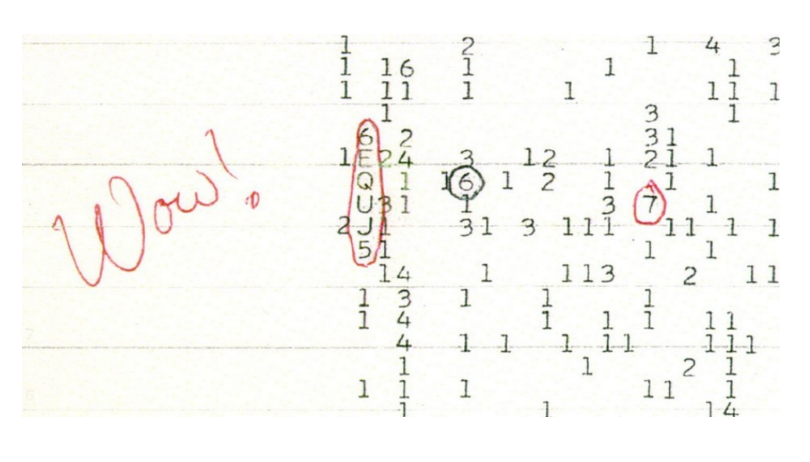

In [3]:
values_no_wow_no_zero = c(rep(1,77), rep(2,8), rep(3,10), rep(4,6), rep(6,2), rep(7,1))

values_no_wow = c(values_no_wow_no_zero, rep(0,17*22-length(values_no_wow_no_zero)))

lambda = mean(values_no_wow)
lambda

wow = c(6, 14, 26, 30, 19, 5)
mean(wow)
prob = ppois(mean(wow), lambda=lambda, lower.tail = F)

cat('Probability of this WOW being a random event:', prob)

[1] 0.4438503

[1] 16.66667

Probability of this WOW being a random event: 1.862167e-21

# 3) Um determinado modelo de formação estelar prevê que cerca de 38% das estrelas de um aglomerado globular devem ser binárias. Seu colaborador estudou 568 estrelas de um aglomerado globular e encontrou que 200 delas devem ser binárias. Com base nesses dados, você pode refutar o modelo mencionado acima?

In [4]:
prop.test(200, n = 568, p=0.38)


	1-sample proportions test with continuity correction

data:  200 out of 568, null probability 0.38
X-squared = 1.7584, df = 1, p-value = 0.1848
alternative hypothesis: true p is not equal to 0.38
95 percent confidence interval:
 0.3130942 0.3931624
sample estimates:
        p 
0.3521127 


# 4)Crie uma função no R que receba um vetor de dados qualquer e forneça como resultado ao usuário: na tela gráfica, uma figura de dois painéis, um ao lado do outro, nos quais o primeiro mostra um gráfico qq-plot para a amostra fornecida e uma linha qqline vermelha tracejada de uma população normal; e no segundo, um histograma do vetor fornecido, acompanhado por um “tapete" de valores individuais na abscissa (comando rug) e de três barras verticais, sendo a central em linha sólida vermelha indicando o valor da média amostral, e as duas linhas laterais tracejadas verdes indicando o erro da média amostral, isto é, μ^±εμ. Lembre-se que o erro da média amostral costuma ser chamado de “erro padrão”. Ainda, adicione nesse último painel a curva da melhor gaussiana ajustada aos dados fornecidos.

In [5]:
install.packages('fitdistrplus')
library(fitdistrplus)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS

Loading required package: survival



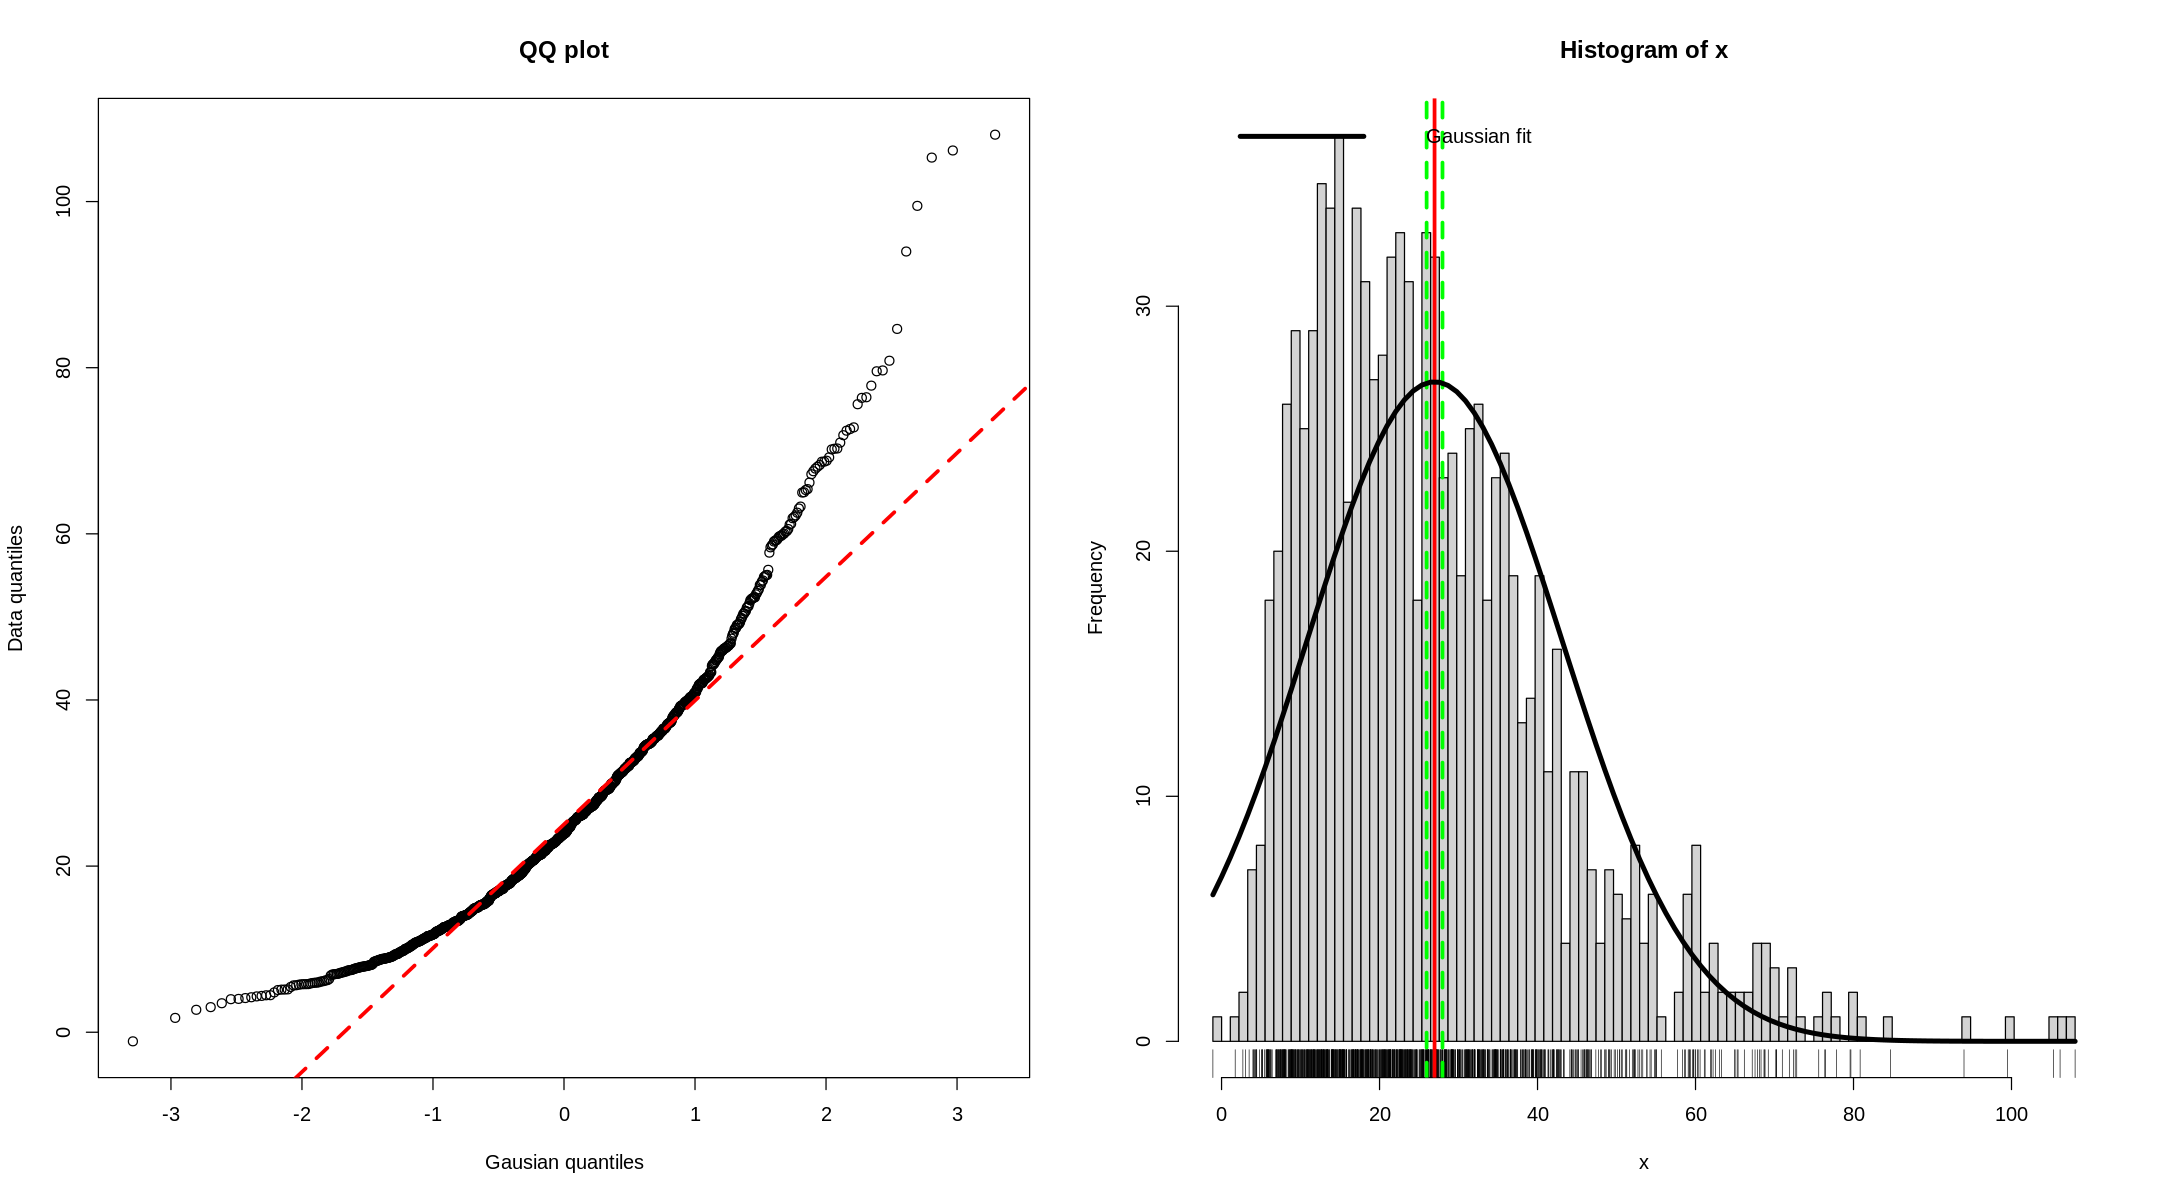

In [6]:
analysis = function(x){
  par(mfcol=c(1,2))
  options(repr.plot.width=18,repr.plot.height=10)
  qqnorm(x, xlab='Gausian quantiles', ylab = 'Data quantiles', main='QQ plot')
  qqline(x, col='red', lwd=3, lty=2)

  hist(x, breaks=seq(min(x), max(x), length.out = 100))
  rug(x)
  results = t.test(x)
  abline(v=results$estimate, col='red', lwd=3)
  abline(v=results$conf.int[1], col='green', lty=2, lwd=3)
  abline(v=results$conf.int[2], col='green', lty=2, lwd=3)

  fit = fitdist(x, 'norm', 'mle')
  x_plot = seq(min(x), max(x), length.out = 100)
  weight = (max(x)-min(x))/100 * length(x)
  y_plot = dnorm(x_plot, mean=fit$estimate[1], sd=fit$estimate[2])*weight
  lines(x_plot, y_plot, lwd=4)
  legend('topleft', legend='Gaussian fit', lwd=4, col='black', box.lwd=0)
}
vetor = rpois(1000,lambda = 3)+rnorm(1000) + 6*rchisq(1000,df=4)
analysis(vetor)

# 5) Estime os parâmetros das leis de potência que descrevem: i) a distribuição de massas das estrelas primárias (M1); e ii) a distribuição de massa das estrelas secundárias (M2). Represente ambas as distribuições empíricas em um gráfico quantil-quantil.

In [7]:
install.packages('VGAM')
library(VGAM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: stats4

Loading required package: splines



In [8]:
binaries = read.table('/content/belikov.dat', header=T, sep='|')

In [9]:
pareto.MLE = function(X) {
  n = length(X)
  m = min(X)
  a = n/sum(log(X)-log(m))
  return(c(m,a))
}

Fit for primary stars (location, shape): 1.16681 0.1031938 
Fit for secundary stars (location, shape): 1.135011 0.1446229

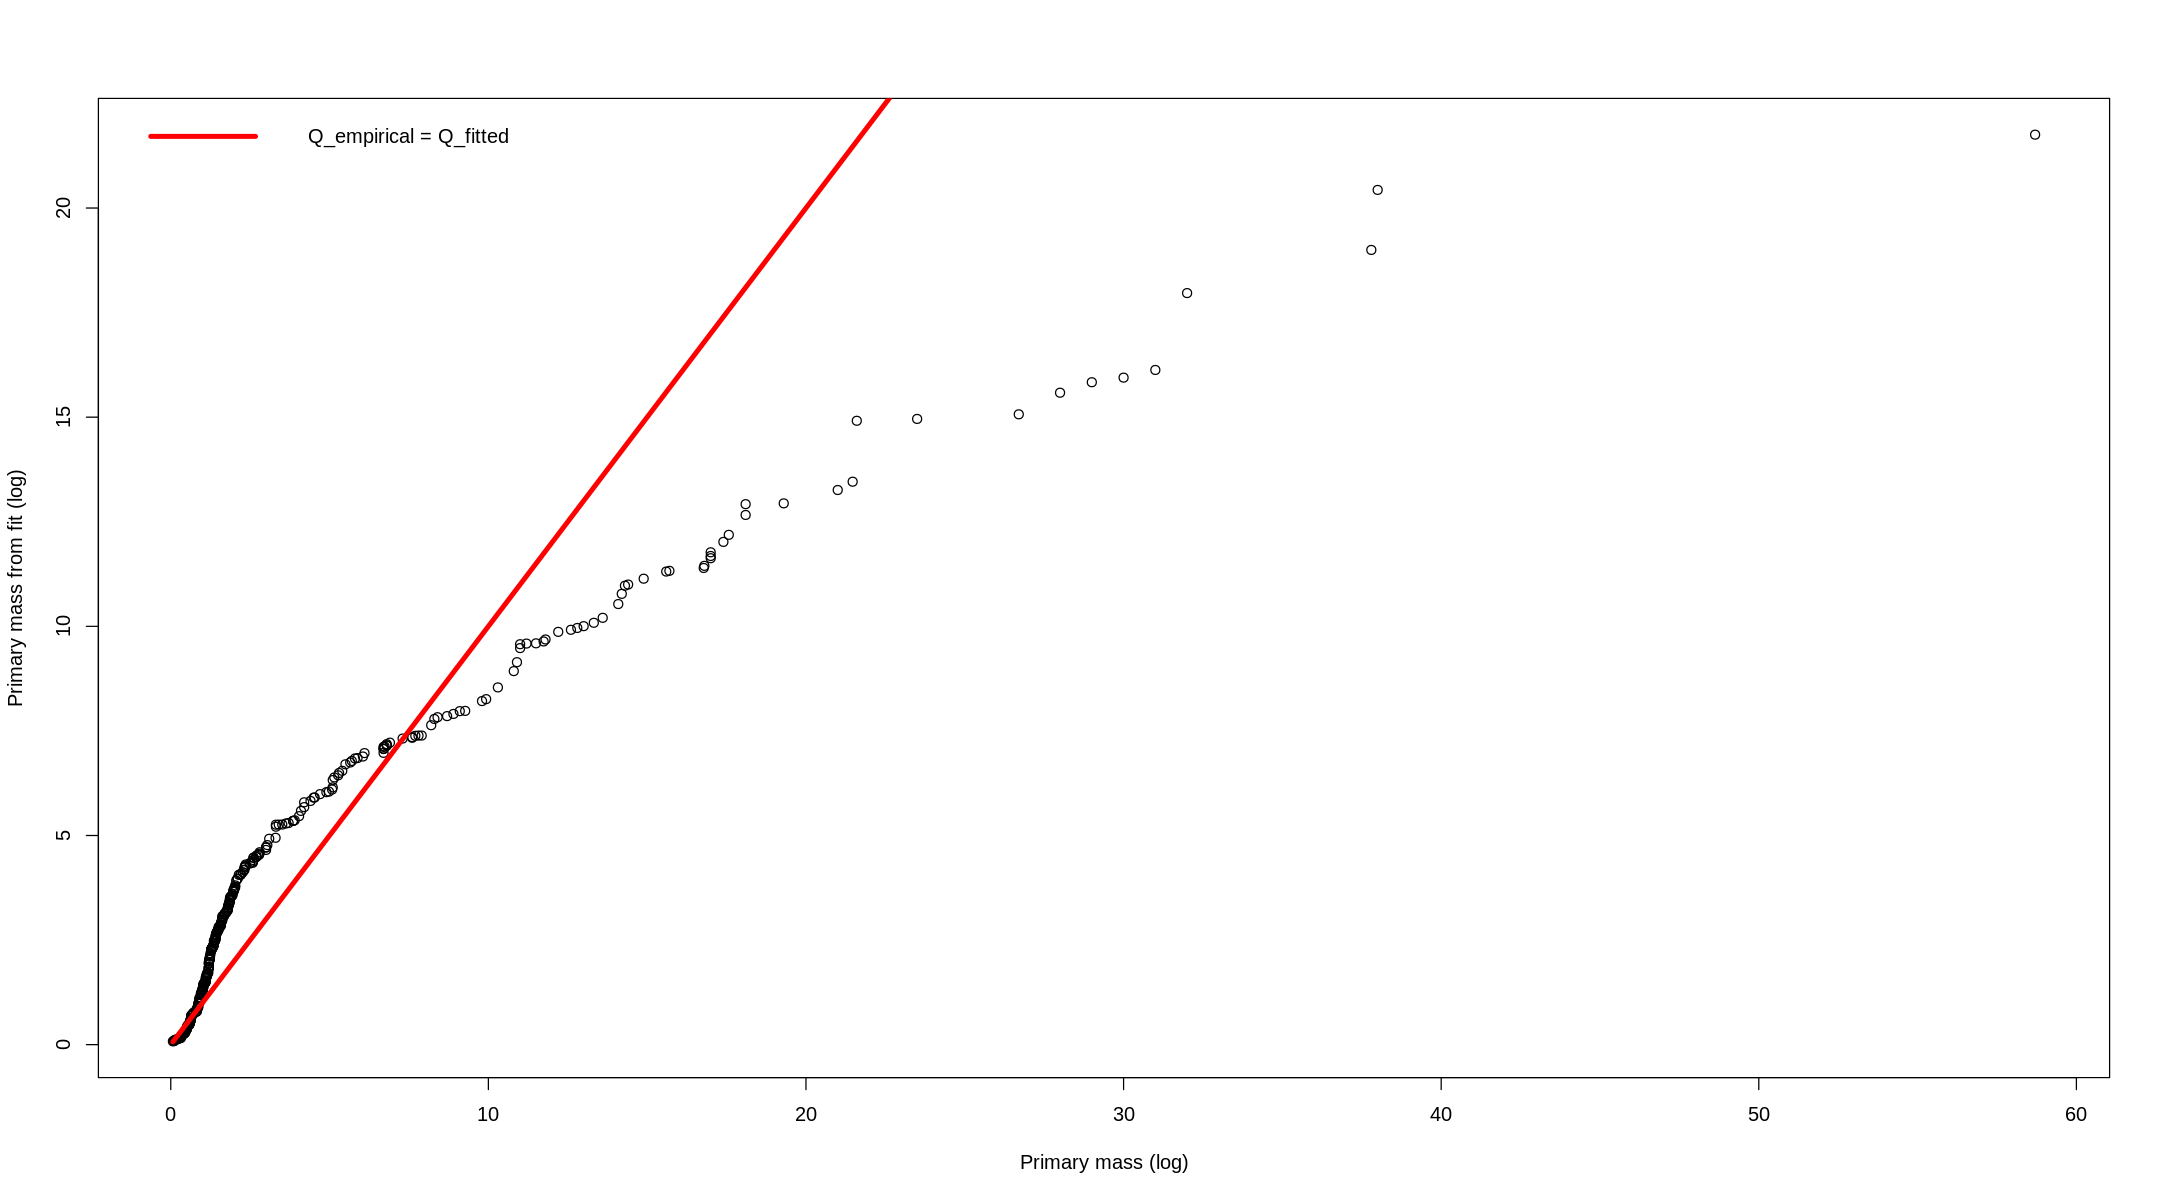

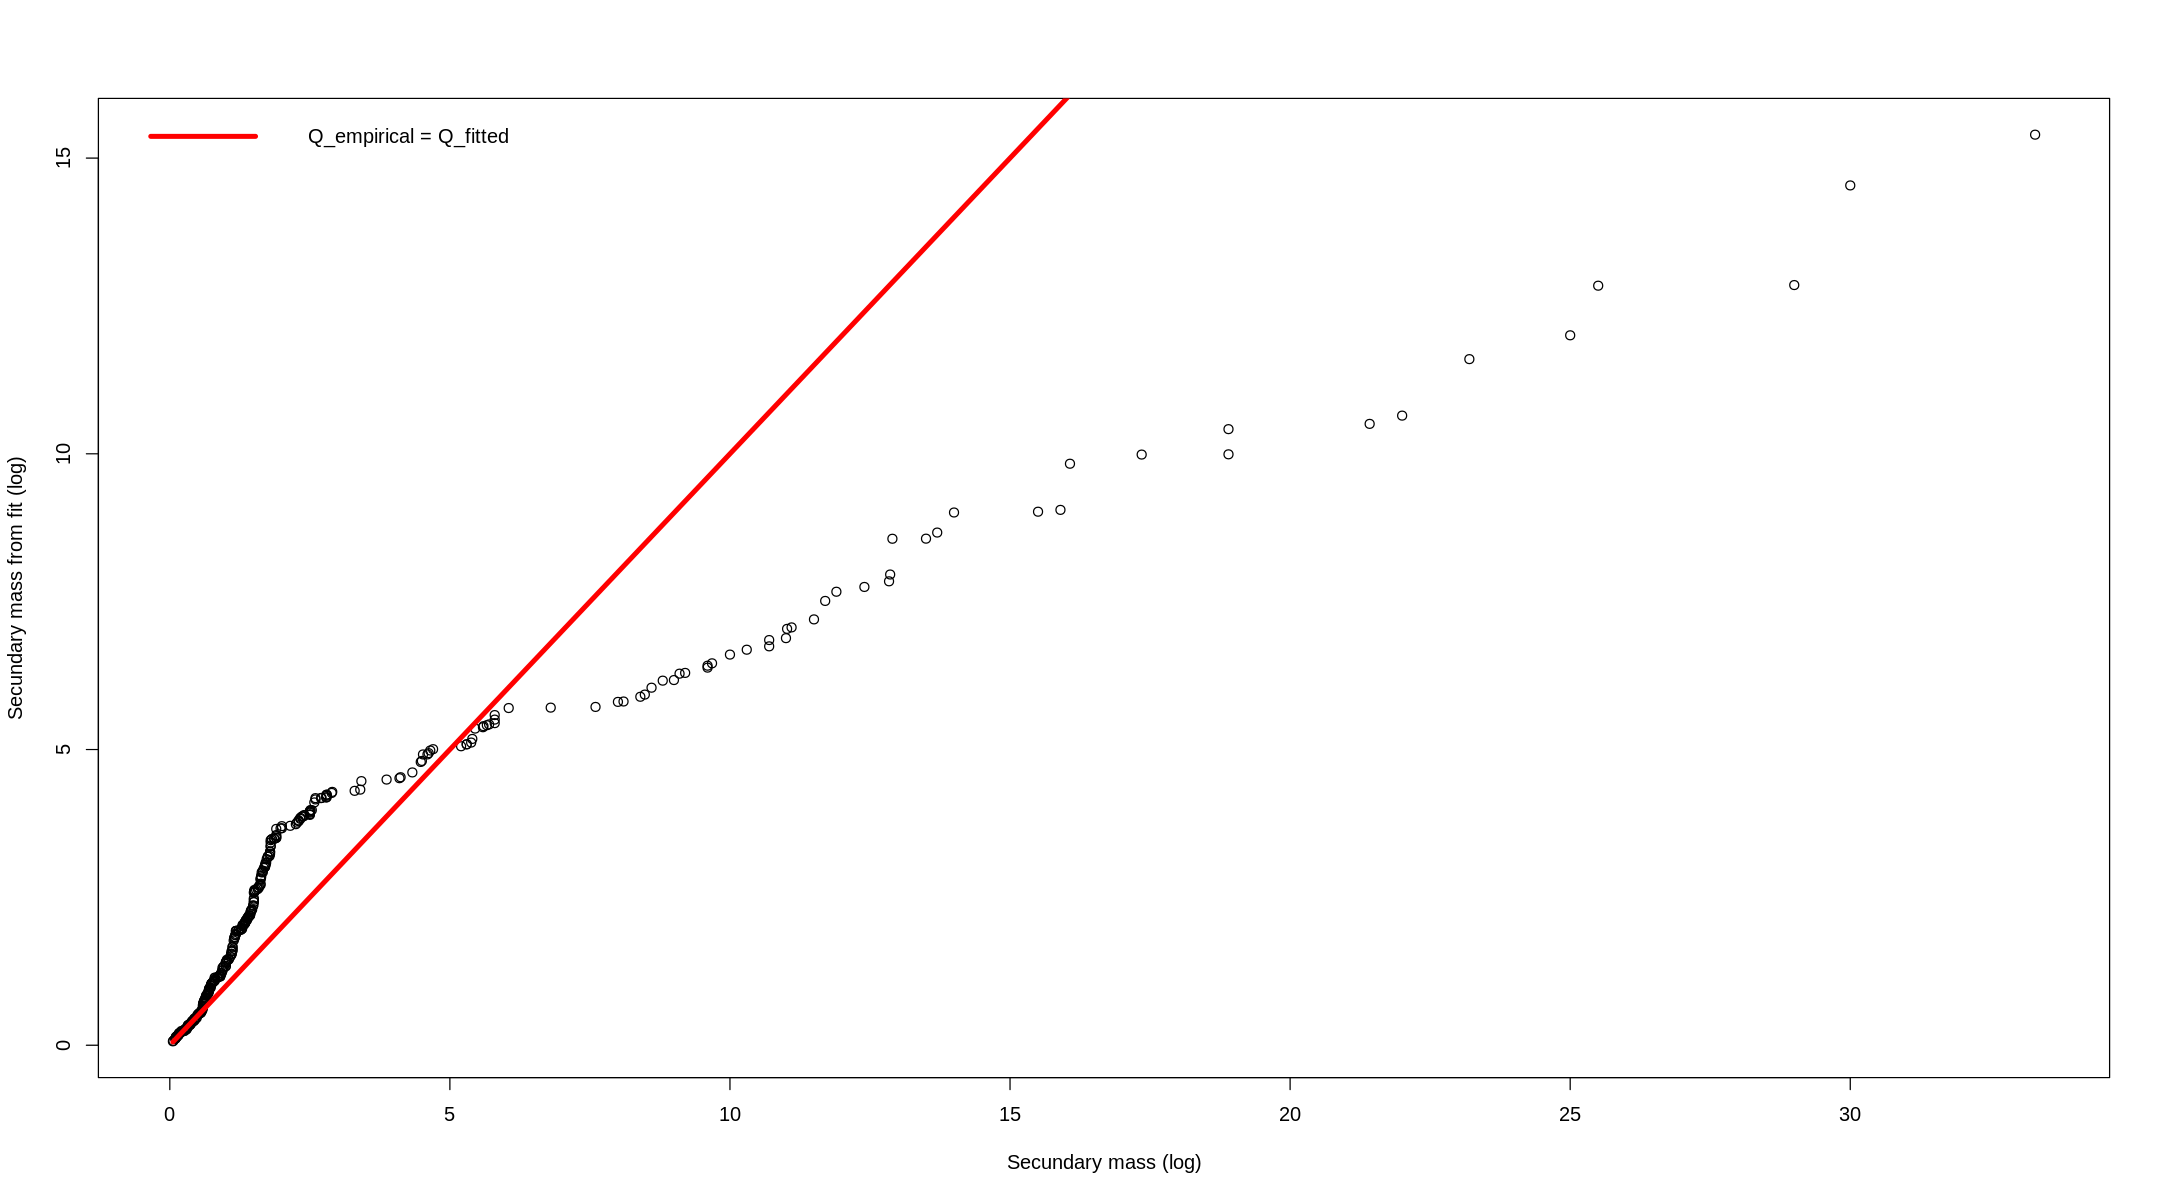

In [10]:
params_m1 = pareto.MLE(10**binaries$M1)
params_m2 = pareto.MLE(10**binaries$M2)
cat('Fit for primary stars (location, shape):',params_m1[1],params_m1[2],'\n')
cat('Fit for secundary stars (location, shape):',params_m2[1],params_m2[2])

fit_m1 = log10(rpareto(length(binaries$M1), shape=params_m1[2], scale=params_m1[1]))
fit_m2 = log10(rpareto(length(binaries$M2), shape=params_m2[2], scale=params_m2[1]))

qqplot(binaries$M1, fit_m1, xlab = "Primary mass (log)", ylab = "Primary mass from fit (log)")
lines(binaries$M1, binaries$M1, col='red', lwd=4)
legend('topleft', legend='Q_empirical = Q_fitted', lwd=4, col='red', box.lwd=0)

qqplot(binaries$M2, fit_m2, xlab = "Secundary mass (log)", ylab = "Secundary mass from fit (log)")
lines(binaries$M2, binaries$M2, col='red', lwd=4)
legend('topleft', legend='Q_empirical = Q_fitted', lwd=4, col='red', box.lwd=0)

# 6) Compare graficamente as distribuições de desvio para o vermelho (z) para cada classe (isto é, Type). A partir dessa comparação, descreva qualitativamente as diferenças encontradas.

In [11]:
data = read.table('/content/QSOBLC.dat', header=T, sep='|')

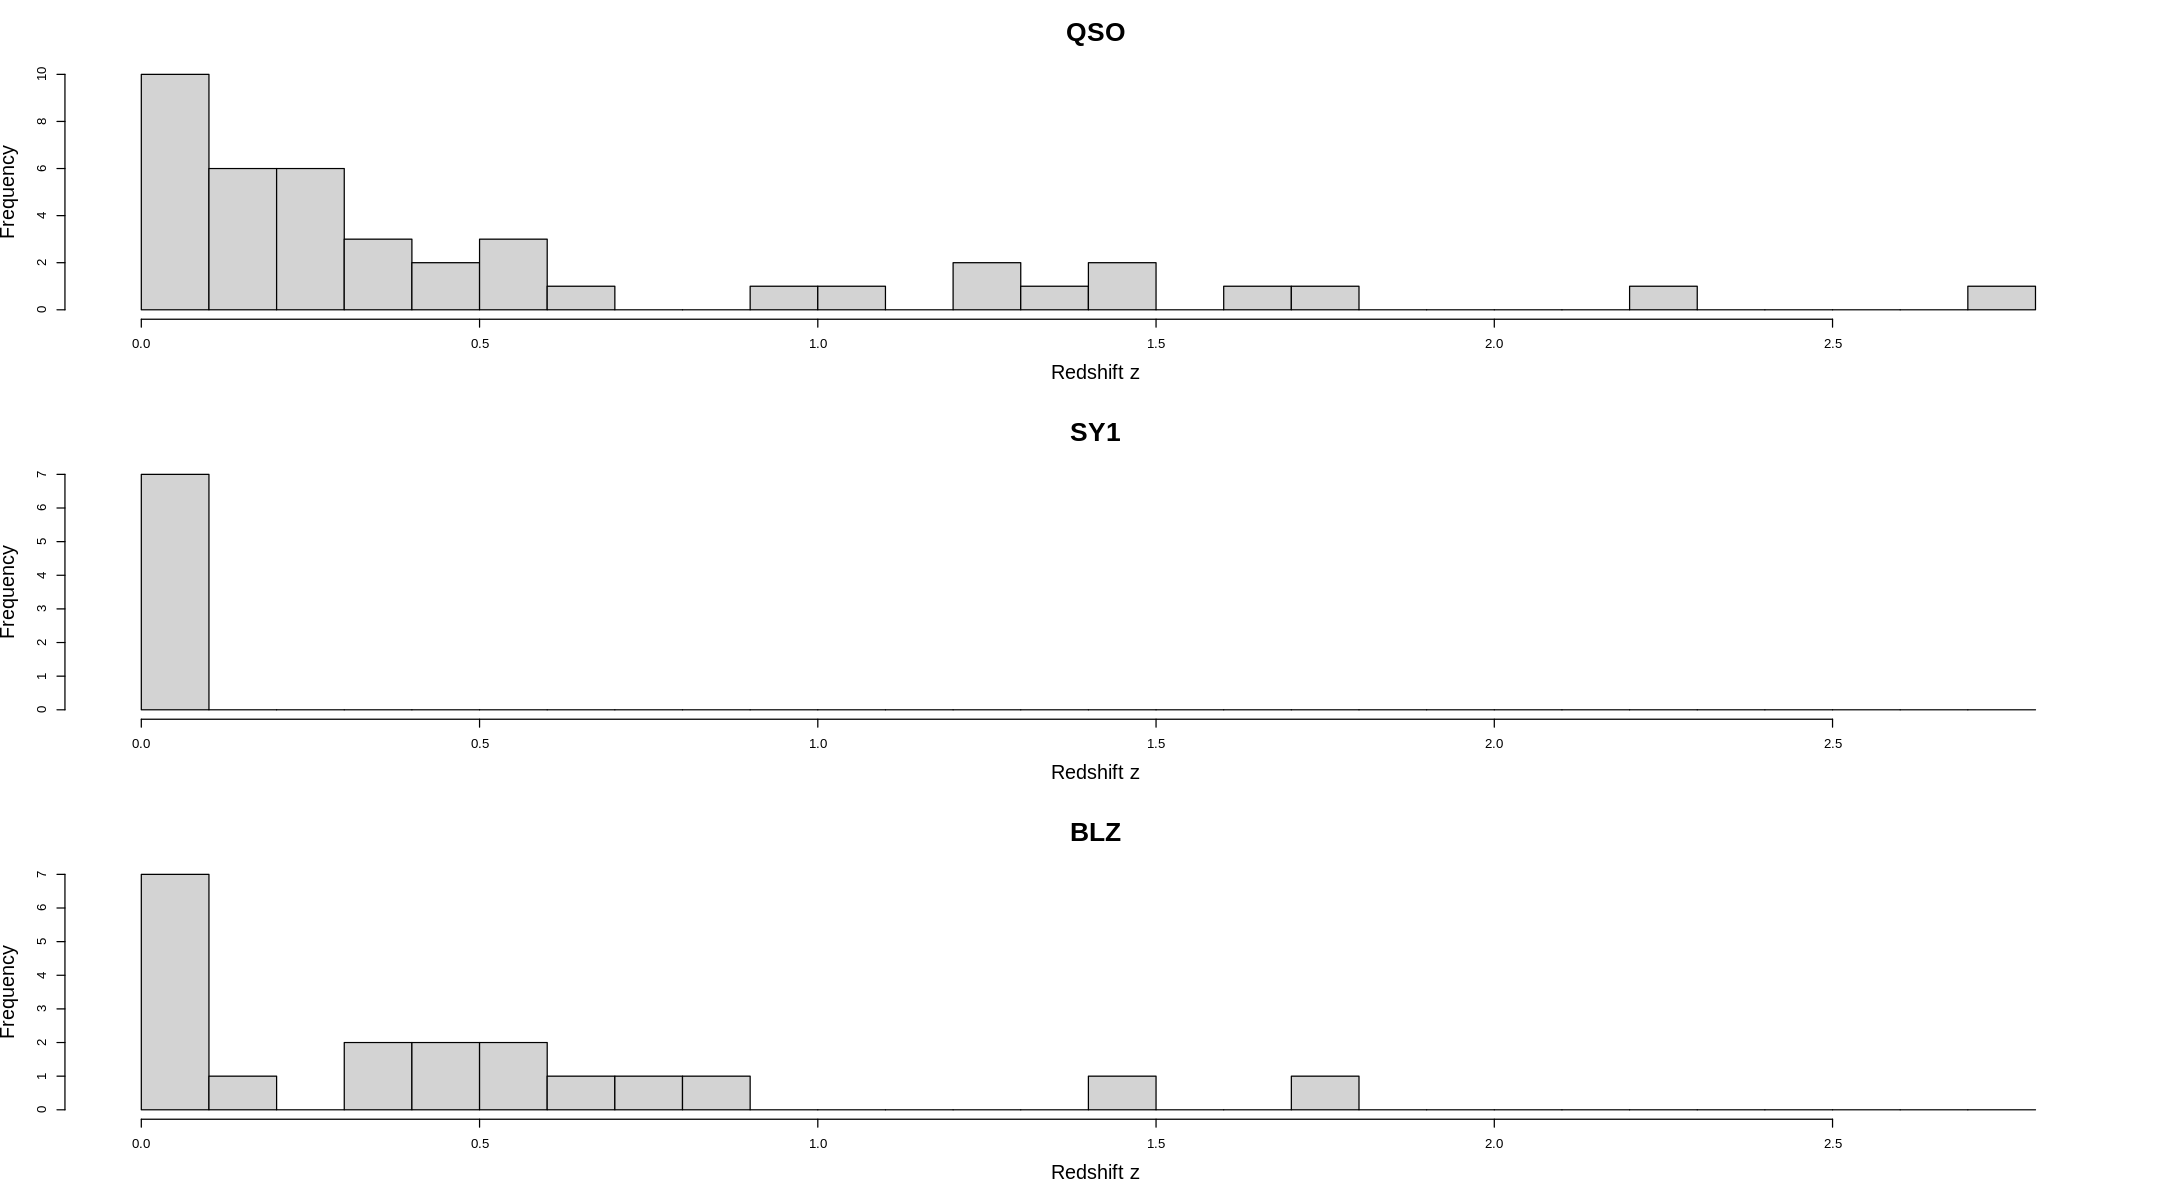

In [18]:
par(mfrow=c(3,1))
for (tip in c('QSO', 'SY1', 'BLZ')) {
  subset = data[data$Type == tip, ]
  hist(subset$z, breaks=seq(0,max(na.omit(data$z)+0.1), by=0.1), xlab = "Redshift z", xlim = c(0,max(na.omit(data$z))+0.1), main=tip, cex.main=2, cex.lab=1.5)
}

# 7) Teste a hipótese de que a distribuição de desvios para o vermelho é similar para os quasares (QSO) e blazares (BLZ). Use argumentos suficientes para justificar o(s) teste(s) escolhido(s).

In [242]:
install.packages('remotes')
install.packages('BSDA')
library(remotes)
install_version('CvM2SL2Test')
library(CvM2SL2Test)
library(BSDA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
qso = data[data$Type=='QSO',]
blz = data[data$Type=='BLZ',]
sy1 = data[data$Type=='SY1',]

qso_z = na.omit(qso$z)
blz_z = na.omit(blz$z)
sy1_z = na.omit(sy1$z)

In [238]:
cvm = cvmts.test(qso_z, blz_z)
cat('p-value from CVM test: ',cvmts.pval(cvm, length(qso_z), length(blz_z)))

p-value from CVM test:  0.2772023

In [257]:
wilcox.test(qso_z,blz_z)

Warning message in wilcox.test.default(qso_z, blz_z):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  qso_z and blz_z
W = 457.5, p-value = 0.3664
alternative hypothesis: true location shift is not equal to 0


In [260]:
t.test(qso_z, blz_z)


	Welch Two Sample t-test

data:  qso_z and blz_z
t = 0.9114, df = 46.288, p-value = 0.3668
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1641220  0.4357987
sample estimates:
mean of x mean of y 
0.5827857 0.4469474 


In [261]:
var.test(qso_z, blz_z)


	F test to compare two variances

data:  qso_z and blz_z
F = 1.8352, num df = 41, denom df = 18, p-value = 0.1654
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7711998 3.8497287
sample estimates:
ratio of variances 
          1.835205 


# 8) Usando uma abordagem paramétrica e outra não paramétrica, calcule o coeficiente de correlação entre o desvio para o vermelho e a magnitude V, para as galáxias Seyfert 1 (SY1)? Qual a abordagem mais correta a ser considerada? Existe alguma base física para a relação encontrada?

In [20]:
cor.test(sy1$z, sy1$Vmag, method='pearson')


	Pearson's product-moment correlation

data:  sy1$z and sy1$Vmag
t = 0.92786, df = 5, p-value = 0.3961
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5198244  0.8818138
sample estimates:
      cor 
0.3832664 


In [21]:
cor.test(sy1$z, sy1$Vmag, method='spearman')

Warning message in cor.test.default(sy1$z, sy1$Vmag, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  sy1$z and sy1$Vmag
S = 36.828, p-value = 0.4523
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3423562 


# 9) Use 1000 sorteios de bootstrap para definir o intervalo de confiança de 97.5% para o valor da mediana da distribuição de desvio para o vermelho (z) da amostra de quasares (QSO) e da amostra de Blazares (BLZ).

In [272]:
install.packages('boot')
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


The following objects are masked from ‘package:VGAM’:

    logit, simplex


The following object is masked from ‘package:survival’:

    aml




In [288]:
theta = function(x,i){
  median(x[i])
}
qso_boot = boot(qso_z, statistic=theta, R=1000)
boot.ci(qso_boot, conf=0.975)

Warning message in boot.ci(qso_boot, conf = 0.975):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = qso_boot, conf = 0.975)

Intervals : 
Level      Normal              Basic         
97.5%   ( 0.1124,  0.4421 )   ( 0.0763,  0.4080 )  

Level     Percentile            BCa          
97.5%   ( 0.1770,  0.5087 )   ( 0.1710,  0.4860 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

In [289]:
blz_boot = boot(blz_z, statistic=theta, R=1000)
boot.ci(blz_boot, conf=0.975)

Warning message in boot.ci(blz_boot, conf = 0.975):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = blz_boot, conf = 0.975)

Intervals : 
Level      Normal              Basic         
97.5%   ( 0.0370,  0.7308 )   ( 0.0640,  0.6638 )  

Level     Percentile            BCa          
97.5%   ( 0.0562,  0.6560 )   ( 0.0461,  0.5950 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

# 10) As distribuições de z e Vmag de cada classe (Type) podem ser consideradas gaussianas? Justifique sua resposta com mais de um teste/análise.

In [318]:
install.packages('nortest')
install.packages('diptest')
install.packages('moments')
library(nortest)
library(moments)
library(diptest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [333]:
for (tip in c('QSO', 'SY1', 'BLZ')) {
  subset = data[data$Type == tip, ]
  z = na.omit(subset$z)
  v = na.omit(subset$Vmag)
  cat('Starting', tip, 'type\n\n')

# Redshift
  if (length(z) > 7) {
  ad_z = ad.test(z)
  cvm_z = cvm.test(z)
  cat('p-value from AD test for redshift in',tip,':',ad_z$p.value,'\n')
  cat('p-value from CVM test for redshift in',tip,':',cvm_z$p.value,'\n')
  }

  dip = dip.test(z)
  shapiro = shapiro.test(z)
  lillie = lillie.test(z)
  cat('p-value from dip test for redshift in',tip,':',dip$p.value,'\n')
  cat('p-value from Shapiro test for redshift in',tip,':',shapiro$p.value,'\n')
  cat('p-value from Lillie test for redshift in',tip,':',lillie$p.value,'\n','\n')

# V mag

  if (length(v) > 7) {
    ad_v = ad.test(v)
    cvm_v = cvm.test(v)
    cat('p-value from AD test for Vmag in', tip, ':', ad_v$p.value, '\n')
    cat('p-value from CVM test for Vmag in', tip, ':', cvm_v$p.value, '\n')
  }

  dip = dip.test(v)
  shapiro = shapiro.test(v)
  lillie = lillie.test(v)
  cat('p-value from dip test for Vmag in', tip, ':', dip$p.value, '\n')
  cat('p-value from Shapiro test for Vmag in', tip, ':', shapiro$p.value, '\n')
  cat('p-value from Lillie test for Vmag in', tip, ':', lillie$p.value, '\n', '\n')
  cat('###########################################################\n\n')
}

Starting QSO type

p-value from AD test for redshift in QSO : 7.681129e-09 
p-value from CVM test for redshift in QSO : 1.121454e-07 
p-value from dip test for redshift in QSO : 0.9870413 
p-value from Shapiro test for redshift in QSO : 1.547669e-06 
p-value from Lillie test for redshift in QSO : 1.573389e-05 
 
p-value from AD test for Vmag in QSO : 0.03655097 
p-value from CVM test for Vmag in QSO : 0.05203636 
p-value from dip test for Vmag in QSO : 0.4685278 
p-value from Shapiro test for Vmag in QSO : 0.03447447 
p-value from Lillie test for Vmag in QSO : 0.06412205 
 
###########################################################

Starting SY1 type



Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


p-value from dip test for redshift in SY1 : 0.1182018 
p-value from Shapiro test for redshift in SY1 : 0.4400546 
p-value from Lillie test for redshift in SY1 : 0.6378789 
 


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


p-value from dip test for Vmag in SY1 : 0.9351645 
p-value from Shapiro test for Vmag in SY1 : 0.2234065 
p-value from Lillie test for Vmag in SY1 : 0.2478134 
 
###########################################################

Starting BLZ type

p-value from AD test for redshift in BLZ : 0.006366748 
p-value from CVM test for redshift in BLZ : 0.01736082 
p-value from dip test for redshift in BLZ : 0.7571165 
p-value from Shapiro test for redshift in BLZ : 0.003163003 
p-value from Lillie test for redshift in BLZ : 0.08508485 
 
p-value from AD test for Vmag in BLZ : 0.06981848 
p-value from CVM test for Vmag in BLZ : 0.06846265 
p-value from dip test for Vmag in BLZ : 0.9826913 
p-value from Shapiro test for Vmag in BLZ : 0.1373625 
p-value from Lillie test for Vmag in BLZ : 0.119869 
 
###########################################################

